In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

X_ttrain = X_train[:,:2]
X_ttest = X_test[:,:2]
# print(X_ttrain.shape)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_ttrain, y_train)

KNeighborsClassifier()

(2274, 2024)
(4602576,)
(2, 4602576)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


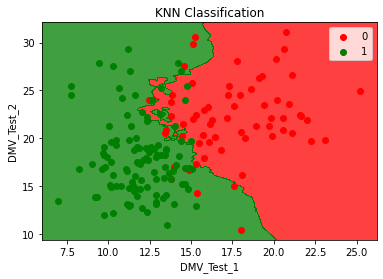

In [4]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_ttest, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# print(X_set.shape)
print(X1.shape)
print(X1.ravel().shape)
print(np.array([X1.ravel(), X2.ravel()]).shape)
knn.predict(np.array([X1.ravel(), X2.ravel()]).T)
# print(X2.shape)
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.legend()
plt.show()

## Knn n=5

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

### testing data set

In [5]:
# print("k-NN accuracy for test set: %f" % model.score(X_test, y_test))
y_pred = knn.predict(X_test)
print("test set")
print("accurcy: %f" % accuracy_score(y_test, y_pred))
print("precision: %f" % precision_score(y_test, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_test, y_pred))
print("f1 scorce: %f" % f1_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

test set
accurcy: 0.959064
precision: 0.946903
recall: 0.990741
f1 scorce: 0.968326
confusion matrix:
 [[ 57   6]
 [  1 107]]


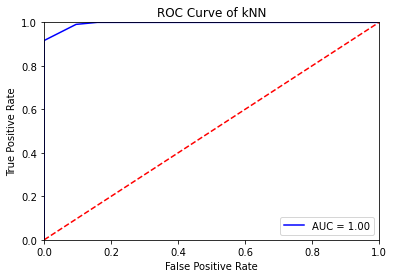

AUC: 0.995297


In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
print("AUC: %f" % roc_auc_score(y_test, y_scores[:, 1]))

AUC: 0.997395


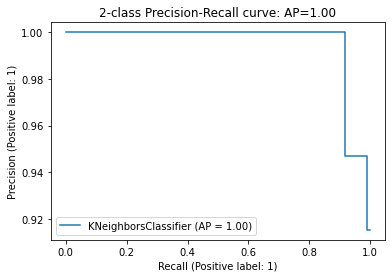

In [7]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
# import matplotlib.pyplot as plt

average_precision = average_precision_score(y_test, y_scores[:, 1])
disp = plot_precision_recall_curve(knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_scores[:, 1])
# lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
print("AUC: %f" % auc(lr_recall, lr_precision))

### training data set

In [8]:
y_pred = knn.predict(X_train)
print("training set")
print("accurcy: %f" % accuracy_score(y_train, y_pred))
print("precision: %f" % precision_score(y_train, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_train, y_pred))
print("f1 scorce: %f" % f1_score(y_train, y_pred))
print("confusion matrix:\n", confusion_matrix(y_train, y_pred))

test set
accurcy: 0.922111
precision: 0.912879
recall: 0.967871
f1 scorce: 0.939571
confusion matrix:
 [[126  23]
 [  8 241]]


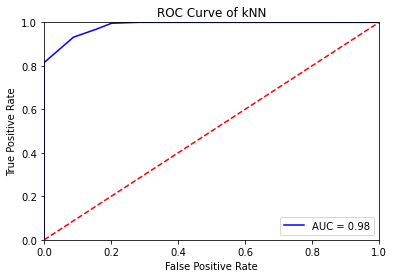

AUC: 0.984583


In [17]:
y_scores = knn.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
print("AUC: %f" % roc_auc_score(y_train, y_scores[:, 1]))

AUC: 0.991129


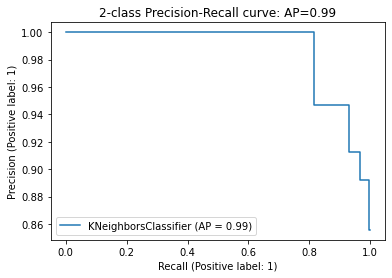

In [18]:
average_precision = average_precision_score(y_train, y_scores[:, 1])
disp = plot_precision_recall_curve(knn, X_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
lr_precision, lr_recall, _ = precision_recall_curve(y_train, y_scores[:, 1])
# lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
print("AUC: %f" % auc(lr_recall, lr_precision))

## Knn n=2

In [14]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### testing data set

In [15]:
y_pred = knn2.predict(X_test)
print("testing set")
print("accurcy: %f" % accuracy_score(y_test, y_pred))
print("precision: %f" % precision_score(y_test, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_test, y_pred))
print("f1 scorce: %f" % f1_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

test set
accurcy: 0.929825
precision: 0.970588
recall: 0.916667
f1 scorce: 0.942857
confusion matrix:
 [[60  3]
 [ 9 99]]


In [16]:
y_pred = knn2.predict(X_train)
print("training set")
print("accurcy: %f" % accuracy_score(y_train, y_pred))
print("precision: %f" % precision_score(y_train, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_train, y_pred))
print("f1 scorce: %f" % f1_score(y_train, y_pred))
print("confusion matrix:\n", confusion_matrix(y_train, y_pred))

test set
accurcy: 0.964824
precision: 1.000000
recall: 0.943775
f1 scorce: 0.971074
confusion matrix:
 [[149   0]
 [ 14 235]]


### Knn n=10

In [24]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### testing set

In [25]:
y_pred = knn10.predict(X_test)
print("testing set")
print("accurcy: %f" % accuracy_score(y_test, y_pred))
print("precision: %f" % precision_score(y_test, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_test, y_pred))
print("f1 scorce: %f" % f1_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

testing set
accurcy: 0.982456
precision: 0.981651
recall: 0.990741
f1 scorce: 0.986175
confusion matrix:
 [[ 61   2]
 [  1 107]]


### training set

In [28]:
y_pred = knn10.predict(X_train)
print("training set")
print("accurcy: %f" % accuracy_score(y_train, y_pred))
print("precision: %f" % precision_score(y_train, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_train, y_pred))
print("f1 scorce: %f" % f1_score(y_train, y_pred))
print("confusion matrix:\n", confusion_matrix(y_train, y_pred))

training set
accurcy: 0.927136
precision: 0.926357
recall: 0.959839
f1 scorce: 0.942801
confusion matrix:
 [[130  19]
 [ 10 239]]


## n=20

In [31]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [32]:
y_pred = knn20.predict(X_test)
print("testing set")
print("accurcy: %f" % accuracy_score(y_test, y_pred))
print("precision: %f" % precision_score(y_test, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_test, y_pred))
print("f1 scorce: %f" % f1_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

testing set
accurcy: 0.964912
precision: 0.955357
recall: 0.990741
f1 scorce: 0.972727
confusion matrix:
 [[ 58   5]
 [  1 107]]


In [33]:
y_pred = knn20.predict(X_train)
print("training set")
print("accurcy: %f" % accuracy_score(y_train, y_pred))
print("precision: %f" % precision_score(y_train, y_pred, zero_division=0))
print("recall: %f" % recall_score(y_train, y_pred))
print("f1 scorce: %f" % f1_score(y_train, y_pred))
print("confusion matrix:\n", confusion_matrix(y_train, y_pred))

training set
accurcy: 0.914573
precision: 0.899628
recall: 0.971888
f1 scorce: 0.934363
confusion matrix:
 [[122  27]
 [  7 242]]
